In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
df = pd.read_csv("AirQualityUCI 1.csv", sep=";", decimal=",", low_memory=False)

df = df.dropna(axis=1, how="all")

df["datetime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    format="%d/%m/%Y %H.%M.%S",
    errors="coerce"
)
df.replace(-200, np.nan, inplace=True)

df.head()



,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [ ]:
df = df[["datetime","CO(GT)","T","RH","AH","NOx(GT)","NO2(GT)"]].copy()

df = df.rename(columns={
    "CO(GT)":"CO", "NOx(GT)":"NOx", "NO2(GT)":"NO2"
})

df = df.dropna(subset=["CO","T","RH","AH"])

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 7344 entries, 0 to 9356
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  7344 non-null   datetime64[ns]
 1   CO        7344 non-null   float64       
 2   T         7344 non-null   float64       
 3   RH        7344 non-null   float64       
 4   AH        7344 non-null   float64       
 5   NOx       6944 non-null   float64       
 6   NO2       6941 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 459.0 KB


In [ ]:
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek

df.head()


,datetime,CO,T,RH,AH,NOx,NO2,month,hour,dayofweek
0,2004-03-10 18:00:00,2.6,13.6,48.9,0.7578,166.0,113.0,3,18,2
1,2004-03-10 19:00:00,2.0,13.3,47.7,0.7255,103.0,92.0,3,19,2
2,2004-03-10 20:00:00,2.2,11.9,54.0,0.7502,131.0,114.0,3,20,2
3,2004-03-10 21:00:00,2.2,11.0,60.0,0.7867,172.0,122.0,3,21,2
4,2004-03-10 22:00:00,1.6,11.2,59.6,0.7888,131.0,116.0,3,22,2


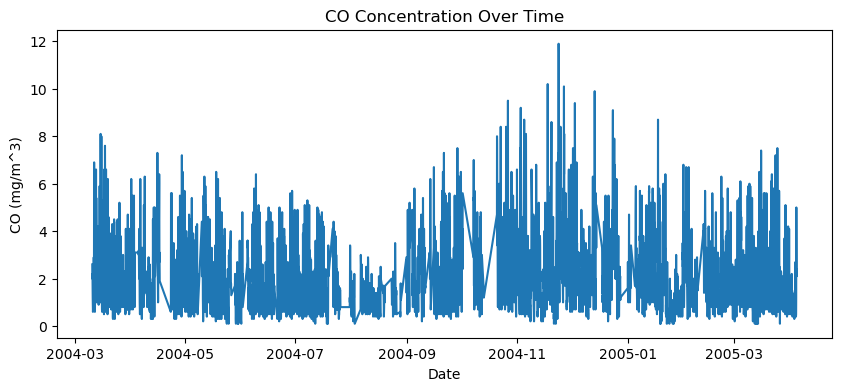

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df["datetime"], df["CO"])
plt.title("CO Concentration Over Time")
plt.xlabel("Date")
plt.ylabel("CO (mg/m^3)")
plt.show()




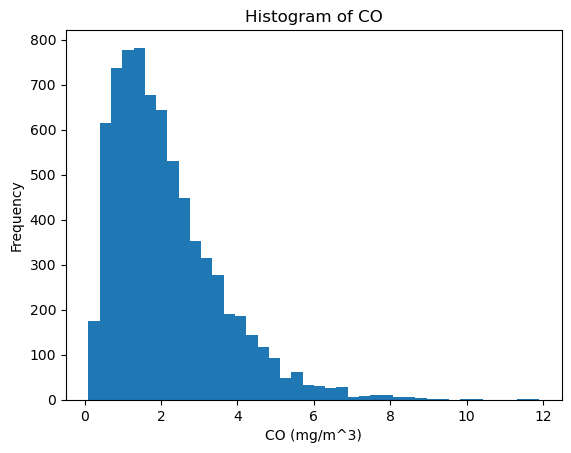

In [ ]:

plt.hist(df["CO"].dropna(), bins=40)
plt.title("Histogram of CO")
plt.xlabel("CO (mg/m^3)")
plt.ylabel("Frequency")
plt.show()



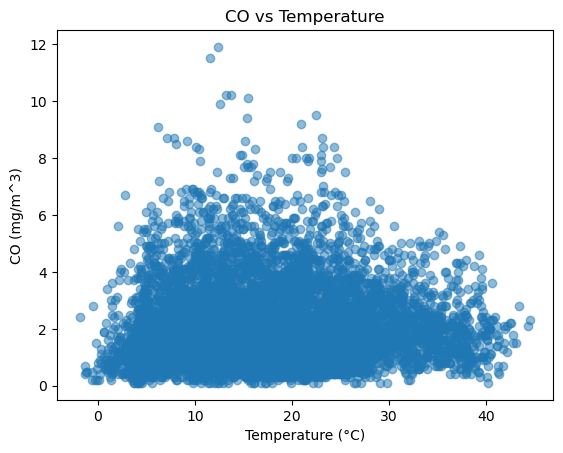

In [ ]:

plt.scatter(df["T"], df["CO"], alpha=0.5)
plt.title("CO vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("CO (mg/m^3)")
plt.show()


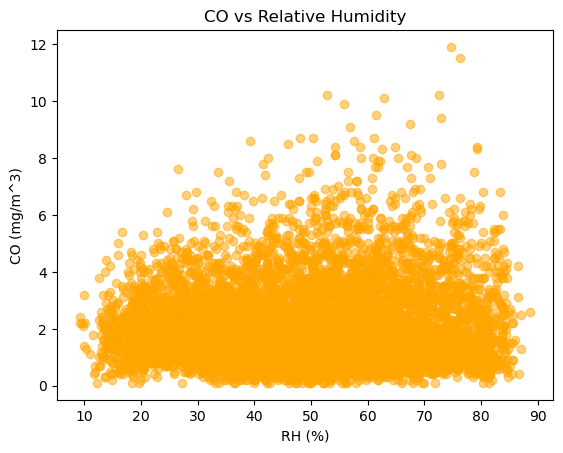

In [ ]:

plt.scatter(df["RH"], df["CO"], alpha=0.5, color="orange")
plt.title("CO vs Relative Humidity")
plt.xlabel("RH (%)")
plt.ylabel("CO (mg/m^3)")
plt.show()


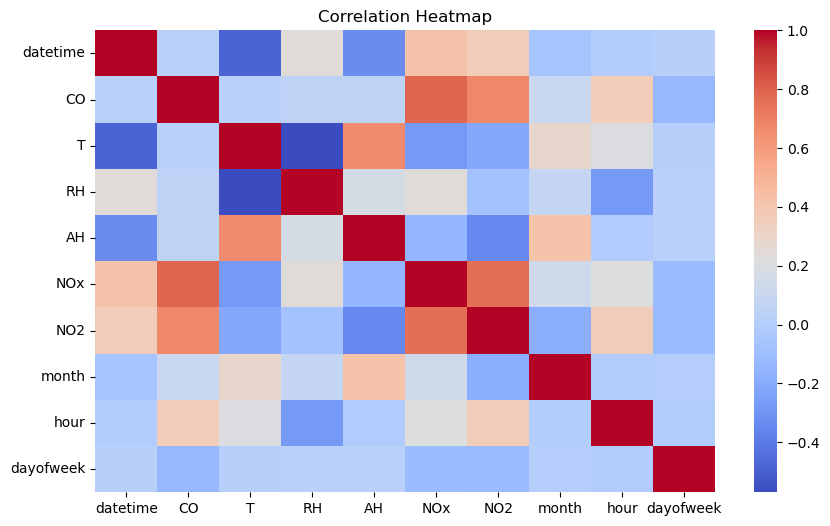

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


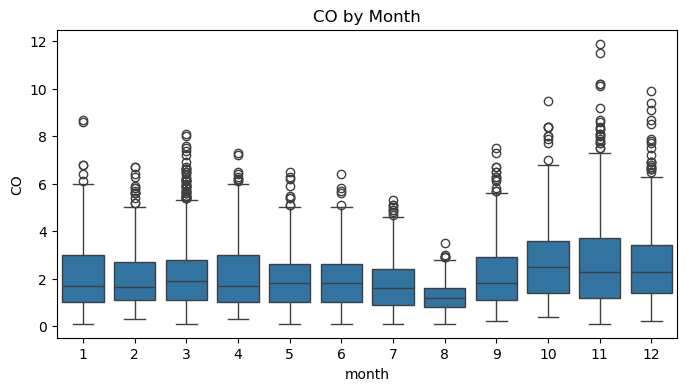

In [ ]:

plt.figure(figsize=(8,4))
sns.boxplot(x="month", y="CO", data=df)
plt.title("CO by Month")
plt.show()

Text(0, 0.5, 'Predicted CO')

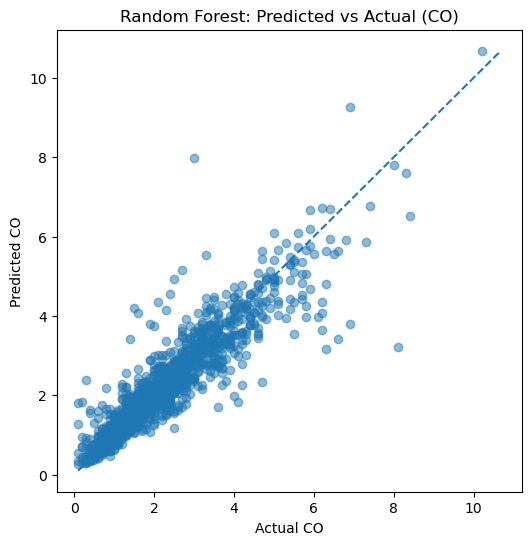

In [ ]:
# Predicted vs Actual (Random Forest)
fig = plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
mn, mx = min(y_test.min(), y_pred_rf.min()), max(y_test.max(), y_pred_rf.max())
plt.plot([mn,mx],[mn,mx], linestyle='--')
plt.title("Random Forest: Predicted vs Actual (CO)")
plt.xlabel("Actual CO"); plt.ylabel("Predicted CO")





Text(0, 0.5, 'Frequency')

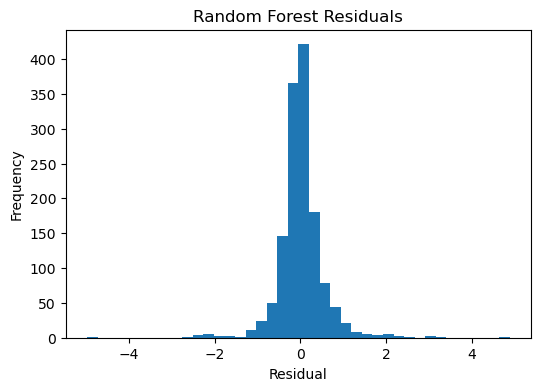

In [ ]:
# Residuals histogram
residuals = y_test - y_pred_rf
fig = plt.figure(figsize=(6,4))
plt.hist(residuals, bins=40)
plt.title("Random Forest Residuals")
plt.xlabel("Residual"); plt.ylabel("Frequency")



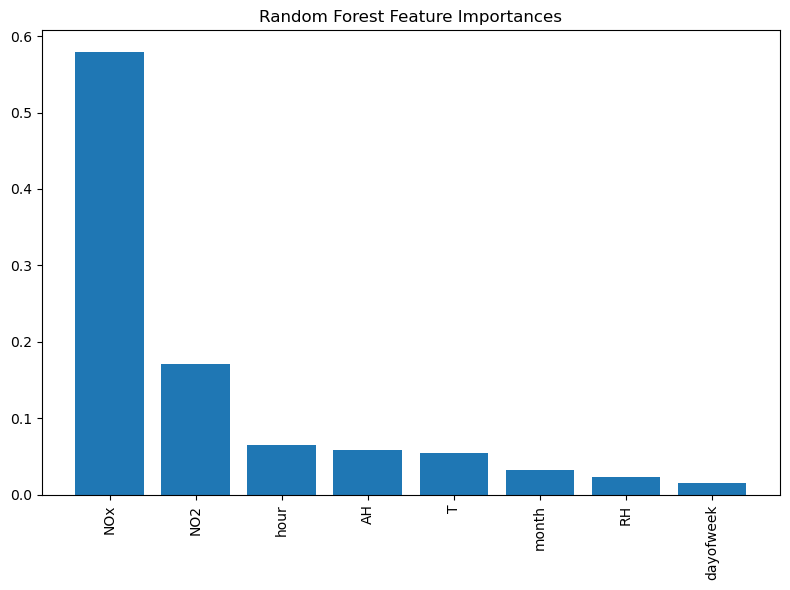

In [ ]:
# Feature importances
importances = rf.feature_importances_
idx = np.argsort(importances)[::-1]  # descending
fig = plt.figure(figsize=(8,6))
plt.bar([features[i] for i in idx], importances[idx])
plt.xticks(rotation=90)
plt.title("Random Forest Feature Importances")
plt.tight_layout()

In [ ]:
target = "CO"
features = ["T","RH","AH","NOx","NO2","month","hour","dayofweek"]

X = df[features].dropna()
y = df.loc[X.index, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
target = "CO"
features = ["T","RH","AH","NOx","NO2","month","hour","dayofweek"]

X = df[features].dropna()
y = df.loc[X.index, target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

def report_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)  # newer sklearn
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))       # fallback for older sklearn
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R2   : {r2:.3f}")

report_metrics("Linear Regression", y_test, y_pred_lr)
report_metrics("Random Forest", y_test, y_pred_rf)




Linear Regression
MAE  : 0.562
RMSE : 0.786
R2   : 0.673

Random Forest
MAE  : 0.338
RMSE : 0.548
R2   : 0.841


In [ ]:
# Example
example_input = X_test.iloc[[0]]

print("Example features:")
print(example_input.to_dict(orient="records")[0])

pred = rf.predict(example_input)[0]
print(f"Predicted CO (mg/m^3): {pred:.3f}")

print("Actual CO:", y_test.iloc[0])


Example features:
{'T': 16.8, 'RH': 36.7, 'AH': 0.6944, 'NOx': 465.0, 'NO2': 156.0, 'month': 11, 'hour': 16, 'dayofweek': 3}
Predicted CO (mg/m^3): 3.194
Actual CO: 2.8
